# Test groupig con t-SNE

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

## Lettura dati

Test con dati Rt degli ultimi 2 mesi memorizzati su file Excel

In [2]:
data=pd.read_excel('rt_regioni.xls')
data.tail(5)

,Unnamed: 0,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,...,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia
115,2021-12-30,1.200192,1.304099,1.193401,1.388104,1.199587,1.074916,1.238764,1.218876,1.446268,...,1.263327,1.349891,1.432607,1.252623,1.279663,1.520435,1.733008,1.262987,1.123777,1.297775
116,2021-12-31,1.243998,1.350069,1.235257,1.476692,1.211164,1.106635,1.240422,1.214198,1.538360,...,1.367157,1.438361,1.509444,1.276516,1.294788,1.638195,1.887448,1.314193,1.156102,1.357804
117,2022-01-01,1.400117,1.456982,1.310543,1.608305,1.245067,1.201470,1.270272,1.215685,1.718196,...,1.509961,1.547040,1.678777,1.318223,1.336843,1.854754,2.053680,1.447078,1.207437,1.465743
118,2022-01-02,1.634565,1.554046,1.362963,1.756673,1.322205,1.318968,1.336724,1.194931,1.823021,...,1.648092,1.616794,1.803947,1.374270,1.390355,2.100691,2.116556,1.585169,1.266812,1.568065
119,2022-01-03,1.870908,1.603639,1.381078,1.815318,1.415006,1.423112,1.405159,1.172535,1.823811,...,1.705139,1.605780,1.902809,1.414258,1.427984,2.240680,2.004414,1.664708,1.308038,1.620556


## T-SNE

### Operazioni preliminari

In [3]:
data_matrix=data.values

# estraggo nomi regioni
regioni=data.columns.values

# estraggo i giorni
giorni=data.index.values

# traspongo per avere una riga per ciascuna regione
data_matrix=data_matrix.transpose()

# ultimi giorni di osservazione su cui baso l'analisi
last_days=21
# estraggo i dati da analizzare
anal_data=data_matrix[:,-last_days:]

### Applicazione algoritmo

In [4]:
embedded_space=TSNE(learning_rate=50,perplexity=4).fit_transform(anal_data)

ValueError: could not convert string to float: '2021-12-14'

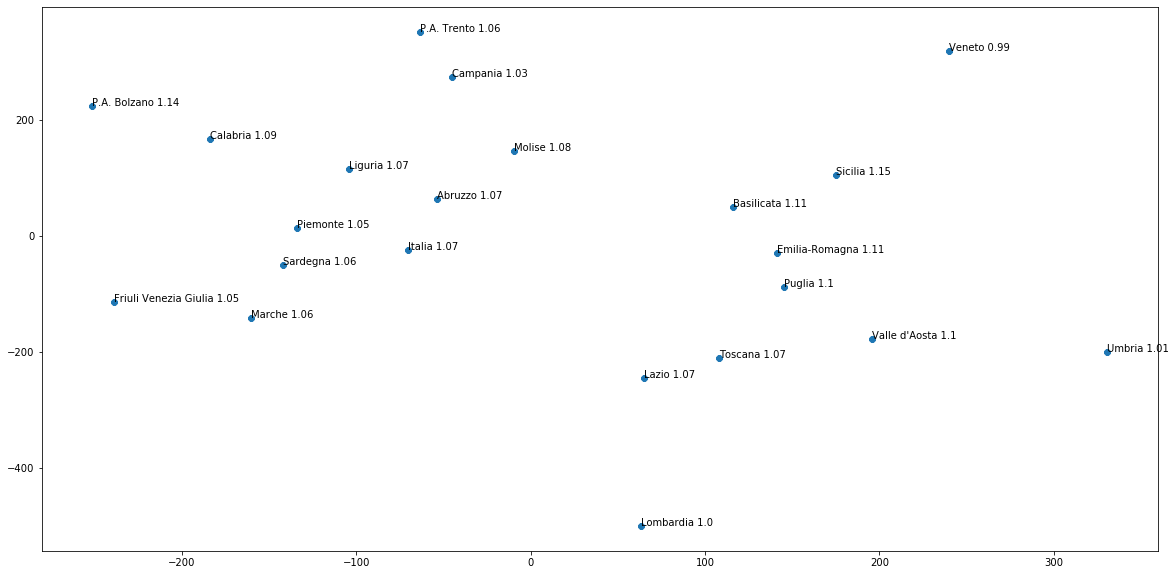

In [ ]:
# plot

fig,ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(embedded_space[:,0],embedded_space[:,1],marker='8',linestyle='')


# creo una stringa complementare per ciascuna regione
#reg_info=[str(np.round(anal_data[i,-1]-anal_data[i,0],2)) for i in range(len(regioni))]
reg_info=[str(np.round(np.mean(anal_data[i,:]),2)) for i in range(len(regioni))]

for i in range(len(regioni)):
    ax.text(embedded_space[i,0],
            embedded_space[i,1],
            regioni[i]+' '+reg_info[i])
